In [20]:
!python -m spacy download es_core_news_lg -q
import spacy
nlp=spacy.load("es_core_news_lg")
ruler = nlp.add_pipe("entity_ruler")

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [26]:
import joblib
from joblib import load 
from joblib import dump

In [28]:
import nltk
import pandas as pd
import numpy as np
from IPython.display import display
!pip install --upgrade matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import joblib
from joblib import load 
from joblib import dump
from sklearn.utils import shuffle
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.utils import shuffle

In [32]:
df=pd.read_csv('Sentimento_completo.csv')
df_general=df[df['Label']=='GENERAL']
df_general=df_general.reset_index(drop=True)


In [34]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)  
    texto = re.sub(r'\d+', '', texto)     
    palabras =word_tokenize(texto)
    doc = nlp(' '.join(palabras))
    palabras = [token.lemma_ for token in doc]
    return ' '.join(palabras)

In [36]:
entidades_semanticas = {
    "GENERAL": {"tipo_semantico":"Película","entidades":["Gladiator 2","secuela","continuacion","película"]},
    "DIRECTOR": {"tipo_semantico": "Persona", "entidades": ["Ridley Scott"]},
    "ACTOR": {"tipo_semantico": "Persona", "entidades": ["Paul Mescal", "Denzel Washington", "Pedro Pascal"]},
    "PRODUCCION": {"tipo_semantico": "Objeto Fílmico", "entidades": ["Ridley Scott","producción","visual", "escenas", "efectos especiales","coreografias","música","dirección","ambientación","dirección","secuencias"]},
    "GUION": {"tipo_semantico": "Objeto escrito", "entidades": ["trama","historia","narrativa","guion","desarrollo","profundidad","personajes"]}
}

In [38]:
patterns = []
for categoria, datos in entidades_semanticas.items():
    for entidad in datos["entidades"]:
        patterns.append({"label": categoria, "pattern": entidad})
ruler.add_patterns(patterns)

In [40]:
model_X= load("modelo_SVC.pkl")
vectorizer=load("vectorizador_tfidf.pkl")

In [42]:
mapeo_sentimientos = {-1: 'NEG', 0: 'NEU',1: 'POS'}
predictions=[]
for index,row in df_general.iterrows():
    comentarios=row['Review']
    continente=row['continent']
    label=row['Label']
    entity=row['Entity']
    text=limpiar_texto(comentarios)
    text_vec=vectorizer.transform([text])
    pred=model_X.predict(text_vec) 
    sent_map = mapeo_sentimientos[pred[0]]
    text_pred=label,entity,comentarios,continente,sent_map
    predictions.append(text_pred)
 
pd.set_option('display.max_colwidth', None)
   
Df_General=pd.DataFrame(predictions,columns=['Label','Entity','Review','Continent','Sentiment'])
Df_General = Df_General.drop_duplicates(subset=['Review'], keep='first')

Df_General.to_csv('GENERAL.csv')
Df_General


,Label,Entity,Review,Continent,Sentiment
0,GENERAL,Gladiator 2,"""Gladiator 2"" es una secuela que",EEUU,POS
2,GENERAL,secuela,esperaba mucho de esta secuela.,EEUU,NEG
3,GENERAL,Gladiator 2,"""Gladiator 2"" no está a la altura de su legado.",EUROPE,NEG
4,GENERAL,Gladiator 2,"""Gladiator 2"" logra mantener el espíritu de la primera película con escenas de batalla bien coreografiadas y una banda sonora poderosa.",EUROPE,POS
5,GENERAL,secuela,Se siente como una secuela innecesaria.,EEUU,NEG
6,GENERAL,Gladiator 2,"Gladiator 2"" cumple con ofrecer acción y drama",EEUU,NEU
7,GENERAL,secuela,tampoco es una secuela memorable.,EEUU,POS
8,GENERAL,Gladiator 2,"Me sorprendió gratamente ""Gladiator 2"".",EEUU,NEU
9,GENERAL,Gladiator 2,"la historia de ""Gladiator 2"" no logra cautivar de la misma manera que la primera.",EEUU,NEG
10,GENERAL,Gladiator 2,"""Gladiator 2"" nos devuelve a la Roma imperial con una producción impecable y un elenco estelar.",EUROPE,POS


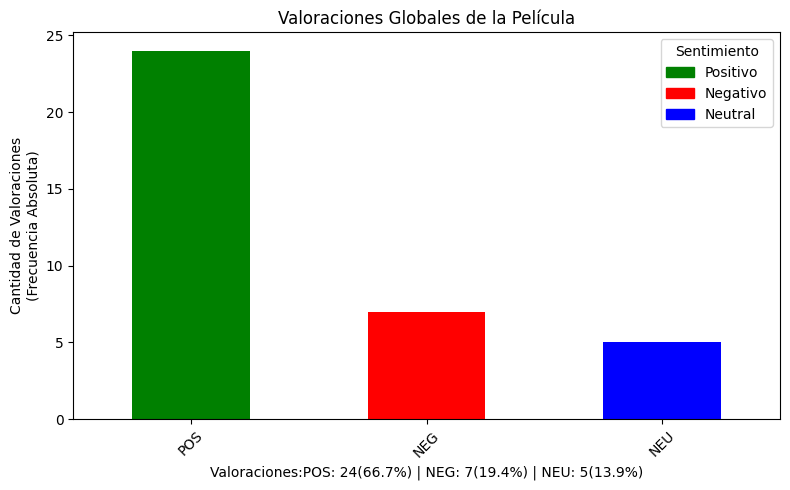

In [46]:
General_sentiment= Df_General['Sentiment'].value_counts()
numero=Df_General['Review'].value_counts()
frecuency_rel = General_sentiment / General_sentiment.sum() * 100 
category=['POS', 'NEU', 'NEG']
Guion_sentiment2 = General_sentiment.reindex(category, fill_value=0)
colors= {'POS': 'green', 'NEG': 'red', 'NEU': 'blue'}
ax=General_sentiment.plot(kind='bar',figsize=(8, 5),color=[colors[label] for label in General_sentiment.index])
plt.title('Valoraciones Globales de la Película')
sentiment_text = " | ".join([f"{key}: {value}({frecuency_rel[key]:.1f}%)" for key, value in General_sentiment.items()])
plt.xlabel(f"Valoraciones:{sentiment_text}")
plt.ylabel('Cantidad de Valoraciones\n(Frecuencia Absoluta)' )
plt.xticks(rotation=45)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in colors.keys()]
labels = ['Positivo', 'Negativo', 'Neutral']  # Describe los colores en la leyenda
plt.legend(handles, labels, title='Sentimiento', loc='upper right')

plt.tight_layout()

plt.show()

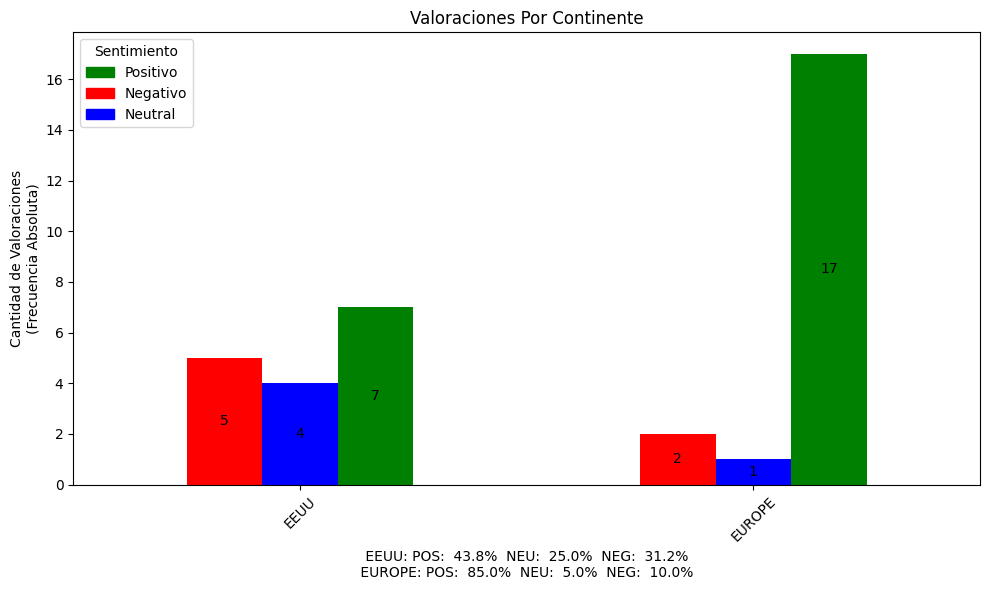

In [48]:
General_cont_sentiment =  Df_General.groupby(['Continent', 'Sentiment']).size().unstack(fill_value=0)

# Crear gráfico de barras apiladas
ax=General_cont_sentiment.plot(kind='bar', stacked=False, figsize=(10, 6), color={'POS': 'green', 'NEG': 'red','NEU':'blue'})
frecuencia_rel= General_cont_sentiment.div(General_cont_sentiment.sum(axis=1), axis=0) * 100
frecuencia_rel= frecuencia_rel.reindex(columns=category, fill_value=0)
frecuencia_text ="\n ".join([
    f"{continent}: "+" ".join([f"{col}:  {frecuencia_rel.loc[continent, col]:.1f}% " for col in frecuencia_rel.columns])
    for continent in frecuencia_rel.index
])
plt.title('Valoraciones Por Continente')
plt.xlabel(f" {frecuencia_text}")
plt.ylabel('Cantidad de Valoraciones\n(Frecuencia Absoluta)')
plt.xticks(rotation=45)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in colors.keys()]
labels = ['Positivo', 'Negativo', 'Neutral']  # Describe los colores en la leyenda
plt.legend(handles, labels, title='Sentimiento', loc='upper left')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center') 
plt.tight_layout()
plt.show()